In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df =pd.read_csv(f'C:/Users/pc/Desktop/ML & DL/Excel/Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#customerID is not useful, hence we drop it

df.drop('customerID', axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes  #here, most of the dtypes are 'object', we need to tranform them and convert in integer/float

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values  #we see the charges are string, we need to convert into integers

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges) #as there are some spaces at front, hence we get error

ValueError: Unable to parse string " " at position 488

In [8]:
pd.to_numeric(df.TotalCharges, errors ='coerce') #'coerce' will ignore the error and replace that with 'NaN'

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df.TotalCharges, errors ='coerce').isnull()]  #we get the dataframe with the values which has 'nan' in totalcharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#we drop these 11 data rows

df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges !=  ' ' ]

df1.shape

(7032, 20)

In [12]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
tenure_churn_no = df1[df1.Churn == 'No']
tenure_churn_yes = df1[df1.Churn == 'Yes']

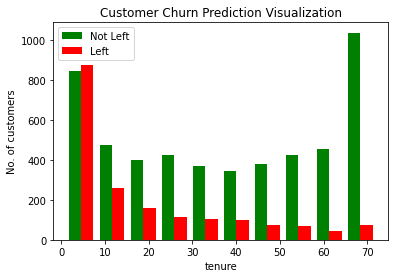

In [16]:
#we plot histogram
plt.xlabel('tenure')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_no.tenure, tenure_churn_yes.tenure], color=['green', 'red'], label=['Not Left', 'Left'])
plt.legend()

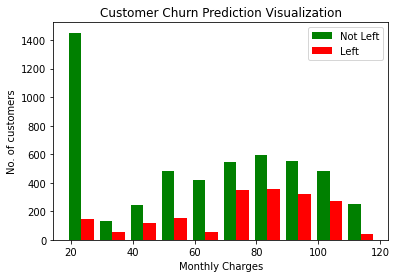

In [17]:
plt.xlabel('Monthly Charges')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_no.MonthlyCharges, tenure_churn_yes.MonthlyCharges], color=['green', 'red'], label=['Not Left', 'Left'])
plt.legend()

In [18]:
#here, in dataframe we see most of the columns have values in 'yes/no'. so we convert then in '1/0'


for columns in df1:
    if df1[columns].dtypes == 'object': #we remove int/float types
        print(f'{columns} : {df1[columns].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
def unique_columns(df1):
    for columns in df1:
        if df1[columns].dtypes == 'object': #we remove int/float types
            print(f'{columns} : {df1[columns].unique()}')

In [21]:
yes_no_columns= ['Partner', 'Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes':1, "No":0 }, inplace=True)

c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
unique_columns(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
#we can also convert 'male/female' into '0/1'. 
df1['gender'].replace({'Female':1, "Male":0 }, inplace=True)

In [24]:
unique_columns(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
#we now 'one hot encode' the above three columns

df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3955,0,0,1,0,29,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5310,0,0,1,0,43,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
1032,1,1,0,0,8,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3160,1,0,1,1,69,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
3535,0,0,1,1,64,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
2804,0,0,1,0,9,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
6806,1,0,1,0,40,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5404,1,0,0,0,46,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [27]:
for columns in df2:
    print(f'{columns} : {df2[columns].unique()}')
    
#here, we all our dataframe is converted to numbers

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [29]:
#for DL model, we need to scale the values from 0 to 1.

from sklearn import preprocessing

scaler= preprocessing.MinMaxScaler()

cols_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

df2[cols_to_scale]= scaler.fit_transform(df2[cols_to_scale])

In [30]:
for columns in df2:
    print(f'{columns} : {df2[columns].unique()}')
    

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [31]:
x = df2.drop('Churn', axis=1)
y = df2.Churn

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [33]:
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [34]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,), activation='relu'), 
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 4s 3ms/step - loss: 0.5104 - accuracy: 0.7344
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7963
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8036
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8043
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8066: 0s - loss: 0.4091 - accura
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8108
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8110
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8089
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8121
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - los

In [35]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7910


[0.44470107555389404, 0.7910447716712952]

In [36]:
yp=model.predict(x_test)
yp[:5]

array([[0.7897813 ],
       [0.03354633],
       [0.378407  ],
       [0.3191983 ],
       [0.5919477 ]], dtype=float32)

In [37]:
y_test[:10]

3551    1
1438    0
4054    0
5545    0
2278    0
6254    0
4419    0
5259    0
4914    0
4544    1
Name: Churn, dtype: int64

In [38]:
y_pred=[]

for i in yp:
    if i >=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:10]

[1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [40]:
#Classification report

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.78      0.79      0.77      1407



Text(69.0, 0.5, 'Truth')

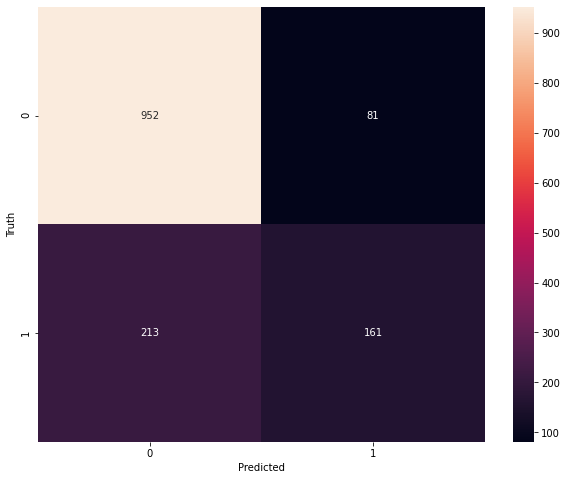

In [41]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
acc =round((936+188)/(936+107+176+188),2)
acc

0.8

In [58]:
#precision for 0 class: customers who did not churn

round(936/(936+176),2)

0.84

In [59]:
#precision for 1 class: customers who churn

round(188/(188+107),2)

0.64

In [60]:
#recall for 0 class:

round(936/(936+107),2)

0.9

In [61]:
#recall for 1 class:

round(188/(188+176),2)

0.52

# Handle imbalance dataset

In [46]:
def ANN(x_train, x_test, y_train, y_test, weights):
    model2 = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,), activation='relu'), 
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])



    model2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

    if weights == -1:
        model2.fit(x_train, y_train, epochs=50)
    
    else:
        model2.fit(x_train, y_train, epochs=50, class_weight= weights)
    
    print(model2.evaluate(x_test, y_test))
    
    y_preds =model2.predict(x_test)
    y_preds=np.round(y_preds)
    
    
    print('Classification reports: \n' , classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(x_train, x_test, y_train, y_test, -1)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4954 - accuracy: 0.7557
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7947
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7989
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7986
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8046
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8064
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8036
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8071
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8057
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8059

# Method 1: Undersampling

In [48]:
#class count
count_class_0 , count_class_1  = df1.Churn.value_counts()

#divide df by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [50]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [51]:
count_class_0 , count_class_1

(5163, 1869)

In [53]:
#here, we undersample the majority class (0) similar to minority class (1)
df_class_0.sample(count_class_1).shape

(1869, 27)

In [54]:
df_class_0_under = df_class_0.sample(count_class_1)

In [55]:
df_class_0_under.shape, df_class_1.shape  #here now both the dataframes have same number of samples

((1869, 27), (1869, 27))

In [56]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5524,0,0,1,1,0.619718,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
3217,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2064,1,0,1,1,0.408451,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2934,1,0,1,1,0.154930,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4061,1,0,0,0,0.183099,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [57]:
x = df_test_under.drop('Churn', axis=1)
y = df_test_under.Churn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15, stratify=y)

#stratify will balance the dataset. i.e churn =1 and churn =0 will be same no. samples

In [58]:
y_train.value_counts() #this is due to 'stratify=y'

0    1495
1    1495
Name: Churn, dtype: int64

In [59]:
y_preds = ANN(x_train, x_test, y_train, y_test, -1)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.7328
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7652
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7652
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7702
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7712
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7766
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7739
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7806
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7763
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7779
Epoch 11/50
94/94 [

# Method 2: Oversampling

In [60]:
count_class_0 , count_class_1 

(5163, 1869)

In [62]:
#here, we oversample the minority class (1) similar to majority class (0)
df_class_1.sample(count_class_0, replace=True).shape  

(5163, 27)

In [66]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_class_1_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2269,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2019,0,0,1,0,0.929577,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
6424,1,0,1,0,1.000000,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
6002,0,0,1,0,0.070423,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1891,1,1,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0,0,1,0,0.816901,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5792,1,1,0,0,0.197183,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
5538,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2039,0,0,0,0,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [67]:
df_class_0.shape, df_class_1_over.shape

((5163, 27), (5163, 27))

In [68]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

df_test_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6,0,0,0,1,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,0.126761,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0,0,1,0,0.816901,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5792,1,1,0,0,0.197183,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
5538,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2039,0,0,0,0,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [69]:
x = df_test_over.drop('Churn', axis=1)
y = df_test_over.Churn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15, stratify=y)

In [70]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [71]:
y_preds = ANN(x_train, x_test, y_train, y_test, -1)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5672 - accuracy: 0.7052
Epoch 2/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7644: 0s - loss: 0.5008 - 
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7715
Epoch 4/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7717
Epoch 5/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7748
Epoch 6/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7770
Epoch 7/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7797
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7816
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7834
Epoch 10/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4

# Method 3: SMOTE

In [72]:
x = df2.drop('Churn', axis=1)
y = df2.Churn

In [73]:
y.value_counts()  #imbalance dataset

0    5163
1    1869
Name: Churn, dtype: int64

In [75]:
#>pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(sampling_strategy='minority')

x_sm, y_sm = smote.fit_resample(x, y)

In [77]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm ,y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [80]:
y_preds = ANN(x_train, x_test, y_train, y_test, -1)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.6990
Epoch 2/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7732
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7759
Epoch 4/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4546 - accuracy: 0.7822: 0s - loss: 0.4520 - accuracy
Epoch 5/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.7914
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.7941
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.7947
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7975
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7992
Epoch 10/50
259/259 [==============================] - 1s 2ms/step - l